<a href="https://colab.research.google.com/github/antonio1134/IA-ACS/blob/main/P3AdalineMulticapaAbalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Función para cargar y preprocesar el dataset
def load_and_preprocess_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
    column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
    data = pd.read_csv(url, names=column_names)

    # Separar características (X) y la variable objetivo (y)
    X = data.drop(columns=['Rings'])
    y = data['Rings']

    # Convertir la columna categórica 'Sex' usando One-Hot Encoding
    column_transformer = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), ['Sex'])],
        remainder='passthrough'
    )
    X = column_transformer.fit_transform(X)

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


In [ ]:
# Función para implementar el Perceptrón Multicapa
def multilayer_perceptron(X_train, X_test, y_train, y_test):
    model = Sequential()

    # Capa de entrada y primera capa oculta
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

    # Segunda capa oculta
    model.add(Dense(8, activation='relu'))

    # Capa de salida
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

    # Evaluar el modelo
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Perceptrón - Error Cuadrático Medio (MSE): {mse:.4f}')

    # Visualización de resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Valores Reales')
    plt.plot(y_pred, label='Predicciones')
    plt.xlabel('Índice')
    plt.ylabel('Edad (Número de anillos)')
    plt.legend()
    plt.title('Perceptrón Multicapa - Predicciones vs Valores Reales')
    plt.show()

In [ ]:
# Función para implementar el modelo Adaline
def adaline(X_train, X_test, y_train, y_test, learning_rate=0.01, epochs=100):
    n_features = X_train.shape[1]
    weights = np.zeros(n_features)
    bias = 0

    mse_values = []  # Para almacenar el MSE de cada época

    for epoch in range(epochs):
        mse_epoch = 0
        for i in range(len(X_train)):
            linear_output = np.dot(X_train[i], weights) + bias
            error = y_train.iloc[i] - linear_output
            weights += learning_rate * error * X_train[i]
            bias += learning_rate * error
            mse_epoch += error**2
        mse_values.append(mse_epoch / len(X_train))  # Calcular el MSE para la época

    # Predicciones
    y_pred = np.dot(X_test, weights) + bias
    mse = mean_squared_error(y_test, y_pred)
    print(f'Adaline - Error Cuadrático Medio (MSE): {mse:.4f}')

    # Visualización de resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Valores Reales')
    plt.plot(y_pred, label='Predicciones')
    plt.xlabel('Índice')
    plt.ylabel('Edad (Número de anillos)')
    plt.legend()
    plt.title('Adaline - Predicciones vs Valores Reales')
    plt.show()

    # Visualización de la curva de pérdida (MSE por épocas)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), mse_values, label='MSE')
    plt.xlabel('Épocas')
    plt.ylabel('Error Cuadrático Medio (MSE)')
    plt.title('Adaline - MSE a lo largo de las épocas')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualización de Predicciones vs Valores Reales (Scatter plot)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Línea Perfecta')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Adaline - Comparación de Predicciones vs Valores Reales')
    plt.legend()
    plt.grid(True)
    plt.show()


--- Perceptrón Multicapa ---
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 117.9467 - val_loss: 93.4854
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85.4538 - val_loss: 57.3093
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.2237 - val_loss: 28.3117
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.2509 - val_loss: 20.1555
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.1566 - val_loss: 13.7653
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1389 - val_loss: 9.7355
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5564 - val_loss: 7.0295
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1730 - val_loss: 5.6954
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.0397 - val_loss: 5.0970
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1715 - val_loss: 4.8556
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7711 - val_loss: 4.7306
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.

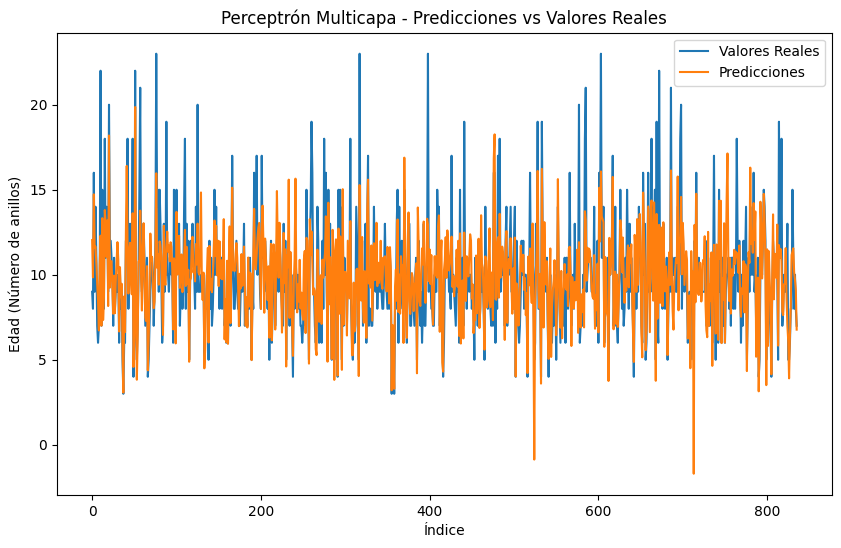


--- Adaline ---
Adaline - Error Cuadrático Medio (MSE): 5.2471


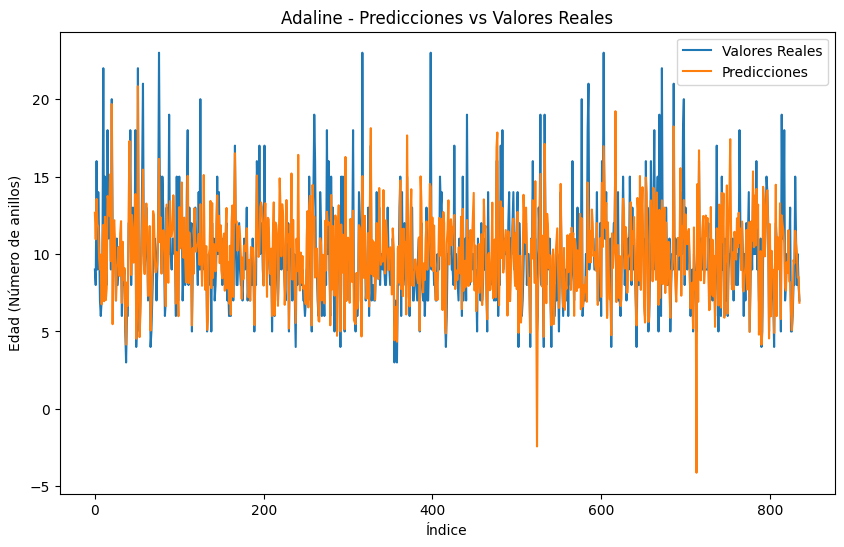

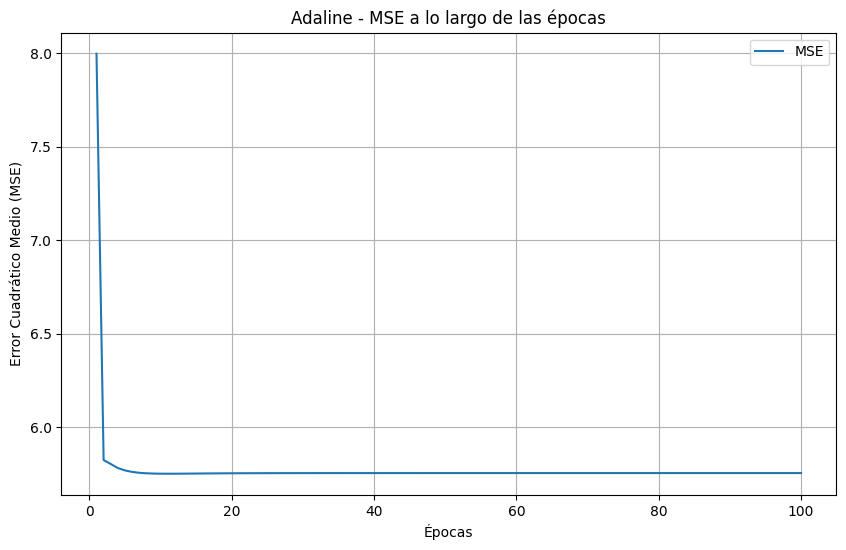

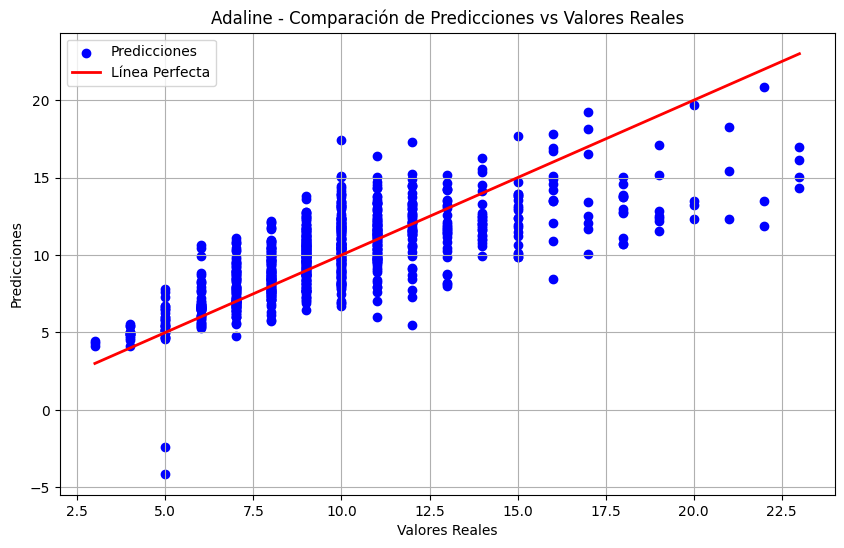

In [ ]:
# Main
if __name__ == "__main__":
    # Cargar y preprocesar los datos
    X_train_scaled, X_test_scaled, y_train, y_test = load_and_preprocess_data()

    # Ejecutar el Perceptrón Multicapa
    print("\n--- Perceptrón Multicapa ---")
    multilayer_perceptron(X_train_scaled, X_test_scaled, y_train, y_test)

    # Ejecutar Adaline
    print("\n--- Adaline ---")
    adaline(X_train_scaled, X_test_scaled, y_train, y_test)